<a href="https://colab.research.google.com/github/DirghayuKaushik/ML-Models/blob/master/Titanic_Dataset_Different_Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd



In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.shape

(891, 12)

In [0]:
test.shape

(418, 11)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
test.isnull().sum(
)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
#importing data vis libraries for Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [0]:
train_test_data = [train, test] #combining both datasets

for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [0]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Lady          1
Capt          1
Mme           1
Ms            1
Jonkheer      1
Sir           1
Countess      1
Name: Title, dtype: int64

In [0]:
title_mapping= {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev" : 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Mme":3, "Capt": 3, "Sir":3 }

for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [0]:
sex_mapping = {"male": 0,"female": 1}

for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
#we will use the median age for title.
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

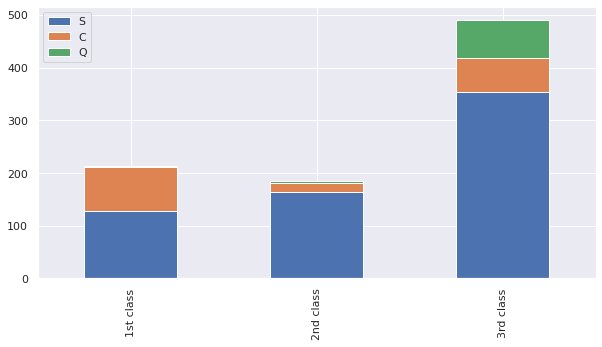

In [0]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [0]:
for dataset in train_test_data:
  dataset['Embarked']=dataset['Embarked'].fillna('S')



In [0]:

embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
  dataset['Embarked']= dataset['Embarked'].map(embarked_mapping)

In [0]:
for  dataset in train_test_data:
  dataset.loc[ dataset['Fare']<= 17, 'Fare']=0,
  dataset.loc[(dataset['Fare'] >17)& (dataset['Fare']<=30), 'Fare']=1,
  dataset.loc[(dataset['Fare'] >30)& (dataset['Fare']<=100), 'Fare']=2,
  dataset.loc[dataset['Fare'] >100, 'Fare']=3


In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,2.0,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.0,NaN,0,0


In [0]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]


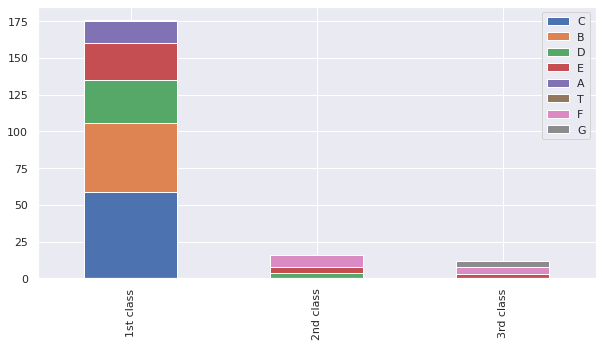

In [0]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))


In [0]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [0]:
cabin_mapping ={"A":0, "B": 0.4,"C": 0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T": 2.8 }

for dataset in train_test_data:
  dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [0]:
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [0]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True )
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [0]:
train["FamilySize"]= train["SibSp"]+ train["Parch"] +1
test["FamilySize"] = test["SibSp"] + test["Parch"]+1

(0.0, 11.0)

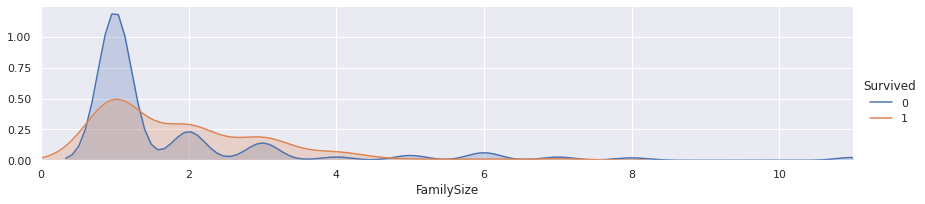

In [0]:
facet =sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [0]:
family_mapping= {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4 }
for dataset in train_test_data:
  dataset['FamilySize']= dataset['FamilySize'].map(family_mapping)

In [0]:
test["Fare"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
test["Title"].fillna(test.groupby("Fare")["Title"].transform("median"), inplace=True)

In [0]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,0.0,2.0,0,0,0.4
1,1,1,1,38.0,2.0,0.8,1,2,0.4
2,1,3,1,26.0,0.0,2.0,0,1,0.0
3,1,1,1,35.0,2.0,0.8,0,2,0.4
4,0,3,0,35.0,0.0,2.0,0,0,0.0


In [0]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [0]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,0.0,2.0,0,0,0.4
1,1,1,1,38.0,2.0,0.8,1,2,0.4
2,1,3,1,26.0,0.0,2.0,0,1,0.0
3,1,1,1,35.0,2.0,0.8,0,2,0.4
4,0,3,0,35.0,0.0,2.0,0,0,0.0


In [0]:
features_drop =['Ticket', 'Name', 'SibSp', 'Parch']
train=train.drop(features_drop, axis=1)
test= test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [0]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,0.0,2.0,0,0,0.4
1,1,1,1,38.0,2.0,0.8,1,2,0.4
2,1,3,1,26.0,0.0,2.0,0,1,0.0
3,1,1,1,35.0,2.0,0.8,0,2,0.4
4,0,3,0,35.0,0.0,2.0,0,0,0.0


In [0]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [0]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,22.0,0.0,2.0,0,0,0.4
1,1,1,38.0,2.0,0.8,1,2,0.4
2,3,1,26.0,0.0,2.0,0,1,0.0
3,1,1,35.0,2.0,0.8,0,2,0.4
4,3,0,35.0,0.0,2.0,0,0,0.0


**Modelling**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


**Cross Validation (K-fold)**



In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Using kNN

In [0]:
clf = KNeighborsClassifier(n_neighbors =13)
scoring ='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs =1, scoring=scoring)
print(score)

[0.75555556 0.82022472 0.7752809  0.66292135 0.79775281 0.78651685
 0.7752809  0.82022472 0.78651685 0.76404494]


In [0]:
round(np.mean(score)*100, 2)

77.44

# Using Decision Trees

In [0]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.74444444 0.84269663 0.71910112 0.80898876 0.83146067 0.78651685
 0.79775281 0.78651685 0.79775281 0.7752809 ]


In [0]:
round(np.mean(score)*100, 2)


78.91

## Using Random Forest

In [0]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring =scoring)
print(score)

[0.74444444 0.86516854 0.75280899 0.7752809  0.86516854 0.82022472
 0.78651685 0.79775281 0.7752809  0.78651685]


In [0]:
round(np.mean(score)*100, 2)

79.69

## Using Naive Bayes


In [0]:
clf = GaussianNB()
scoring = 'accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [0]:
round(np.mean(score)*100, 2)

78.78

### Using SVM 

In [0]:
clf =SVC()
scoring = 'accuracy'
score= cross_val_score(clf, train_data, target, cv=k_fold, n_jobs =1, scoring=scoring)
print(score)


[0.72222222 0.78651685 0.76404494 0.68539326 0.82022472 0.80898876
 0.74157303 0.75280899 0.6741573  0.73033708]


In [0]:
round(np.mean(score)*100, 2)

74.86

# Testing

In [0]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data =test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [0]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived": prediction  

})

submission.to_csv('submission.csv', index=False)

In [0]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
